In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [36]:
data = pd.read_csv('diabetes2.csv', header = 0)
print(data.head(5))
print(data.tail(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [40]:
Y=data['Outcome']
X=data.drop('Outcome',axis=1)

In [41]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


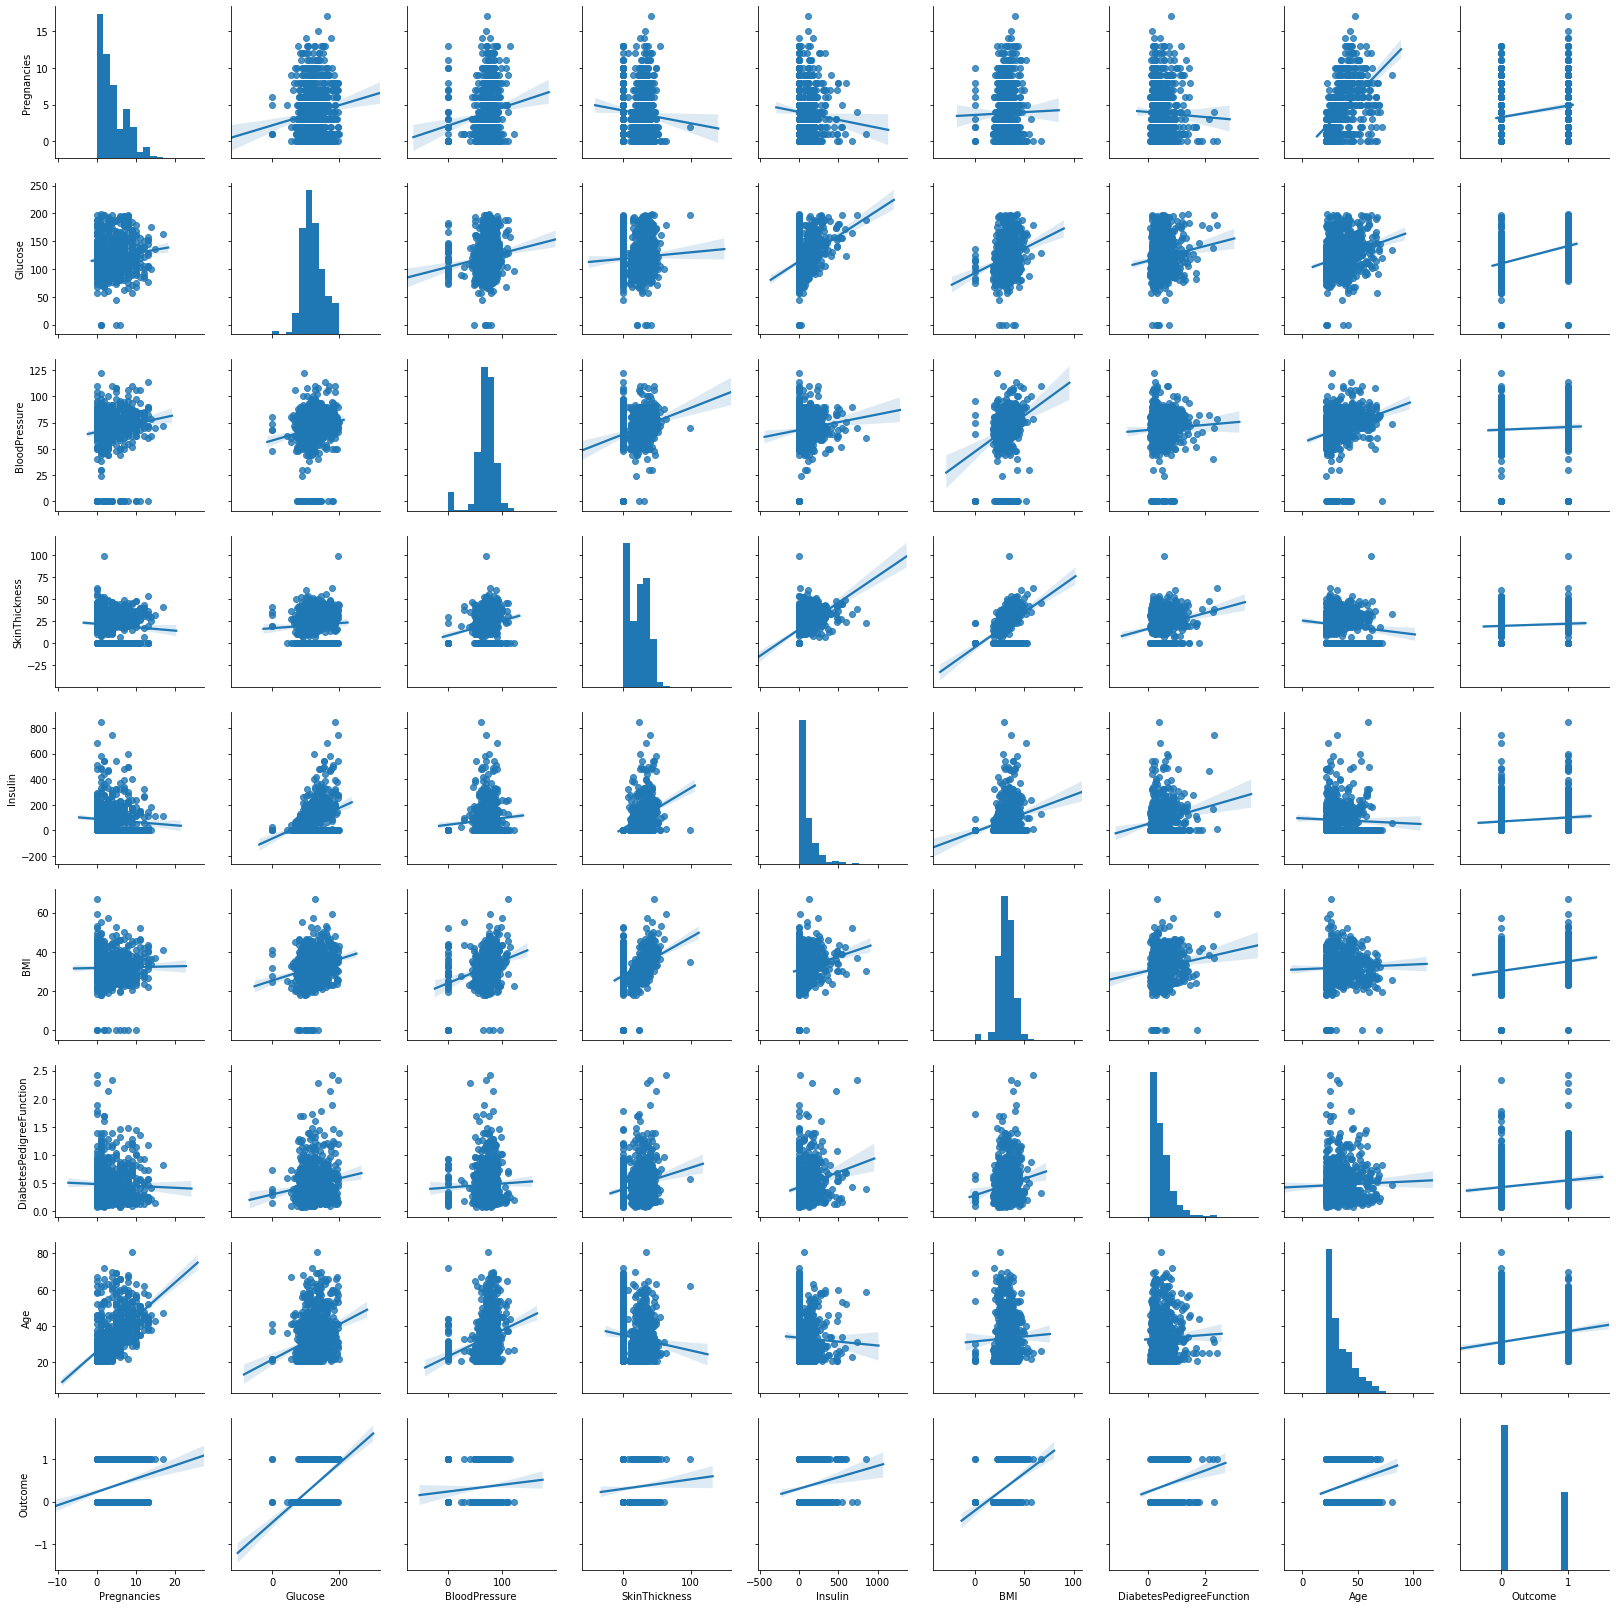

In [42]:
sns.pairplot(data,kind='reg')
plt.show()

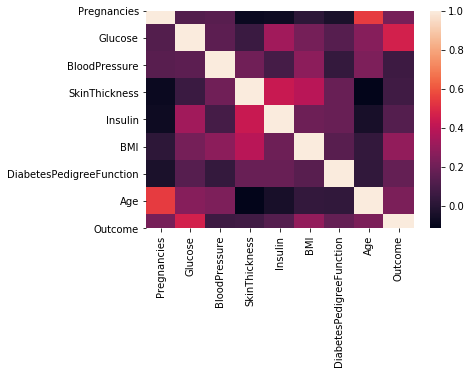

In [43]:
sns.heatmap(data.corr())
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7 , test_size=0.3, random_state=10)

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', class_weight="balanced")

In [46]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred = log_reg.predict(X_test)
print(y_pred)

[1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 1 1 0 0 0]


In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, roc_curve, auc, roc_auc_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [49]:
print('Accuracy is  :' ,accuracy)
print('Precision is  :',precision)
print('Recall is  :',recall)
print('Roc Auc is  :',roc_auc)
print('Confusion Matrix is  :\n',cm)

Accuracy is  : 0.7532467532467533
Precision is  : 0.6630434782608695
Recall is  : 0.7011494252873564
Roc Auc is  : 0.7429358237547894
Confusion Matrix is  :
 [[113  31]
 [ 26  61]]


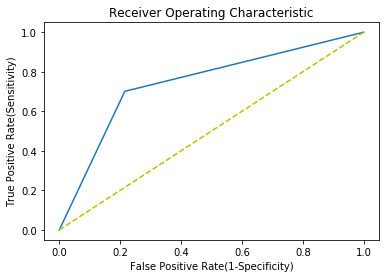

Area under the curve:  0.743


In [50]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'y--')
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.show()

print("Area under the curve: ",round(auc(false_positive_rate, true_positive_rate),3))